# 90°剥離試験の解析

## 粘着力の初期上昇時間を60℃恒温槽で短縮できるか？


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('thermostatic_chamber_time_reduction.csv',sep="\t"
                 ,skiprows=2
                 ,names=['1','2','3','4']
                 )
# 2n行目が下限荷重、2n+1行目が上限荷重, n=0,1,2,3:恒温槽で加熱した回数。
print(df)

        1       2       3       4
0   36.14   59.01   58.01   64.07
1   38.43   61.77   60.72   65.96
2  205.16  193.17  167.70  198.31
3  207.84  197.51  173.09  202.83
4  181.39  197.50  174.70  202.83
5  184.35  202.83  178.09  205.44


In [3]:
#2n行目と2n+1行目の平均と差をとり、各列ごとにプロットする。
weight=df.to_numpy()
average = np.empty(0) #上限と下限の平均
diff = np.empty(0)  #上限と下限の差分
nmeasure = 3 #
nsample = 4

for n in range(3):
    row1 = weight[2*n] 
    row2 = weight[2*n+1]
    average = np.append(average,(row1+row2)/2)
    diff = np.append(diff,abs(row1-row2))
average = average.reshape(nmeasure,nsample).T
diff = diff.reshape(nmeasure,nsample).T
print("average=",average,"\n")    
print("diff=",diff,"\n")    


average= [[ 37.285 206.5   182.87 ]
 [ 60.39  195.34  200.165]
 [ 59.365 170.395 176.395]
 [ 65.015 200.57  204.135]] 

diff= [[2.29 2.68 2.96]
 [2.76 4.34 5.33]
 [2.71 5.39 3.39]
 [1.89 4.52 2.61]] 



0
1
2
3


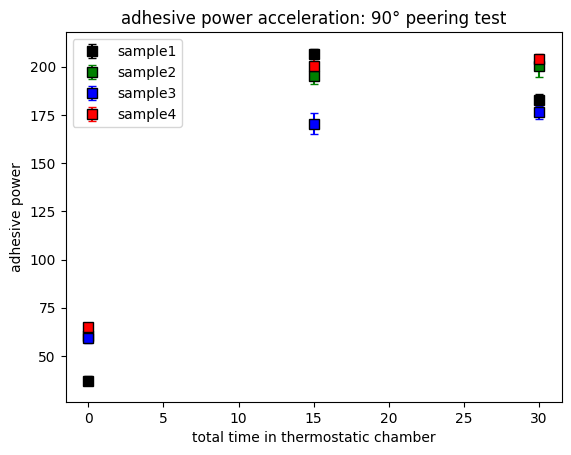

In [5]:
# 各点を平均値とする
x = [0,15,30]
fig, ax = plt.subplots()
colors = ['black','green','blue','red']

for i in range(4): 
    ax.errorbar(x, average[i], yerr=diff[i], capsize=3, fmt='s'
                , ecolor=colors[i], color=colors[i],ms=7, mec='k'
                , label=f'sample{i+1}')

ax.set_xlabel('total time in thermostatic chamber')
ax.set_ylabel('adhesive power')
ax.legend()
ax.set_title('adhesive power acceleration: 90° peering test')
plt.show()

# 90°剥離試験の解析

In [14]:

df_70 = pd.read_csv('70_dC.csv',sep="\t"
                 ,skiprows=1
                 ,names=['1','2','3','4']
                 )
#print(df_70)


y_70=df_70.to_numpy()
y70_array = np.empty(0)
y70_diff = np.empty(0)
y70_average =np.empty(0)
y70_averagediff =np.empty(0)

nmeasure = 3
nsample = 4
for n in range(nmeasure):
    row1 = y_70[2*n] 
    row2 = y_70[2*n+1]
    y70_array = np.append(y70_array,(row1+row2)/2)
    y70_diff = np.append(y70_diff,abs(row1-row2))
    y70_average=np.append(y70_average,np.average(y70_array[n]))
    y70_averagediff=np.append(y70_average,y70_diff[np.argmax(y70_diff)])
print(y70_array)
print("y70_average=",y70_average,"\n")    
print("y70_averagediff=",y70_averagediff,"\n")



[37.285 60.39  59.365 65.015 39.26  42.57  46.895 49.415 39.785 53.52
 39.785 37.955]
y70_average= [37.285 60.39  59.365] 

y70_averagediff= [37.285 60.39  59.365  4.96 ] 



       1      2      3      4
0  62.58  45.33  45.33  60.72
1  64.27  48.74  48.74  62.58
2  67.23  67.23  66.78  69.64
3  70.42  70.42  69.64  71.22
[62.58 45.33 45.33 60.72] 
 [64.27 48.74 48.74 62.58]
[67.23 67.23 66.78 69.64] 
 [70.42 70.42 69.64 71.22]
y90_array= [63.425 47.035 47.035 61.65  68.825 68.825 68.21  70.43 ] 

y90_average= [63.425 47.035] 

y90_averagediff= [3.41 3.41] 



ValueError: 'yerr' (shape: (4,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (3,))

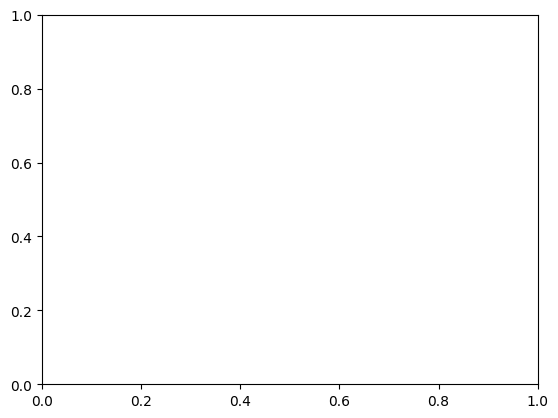

In [12]:
df_90 = pd.read_csv('90_dC.csv',sep="\t"
                 ,skiprows=1
                 ,names=['1','2','3','4']
                 )
print(df_90)
y_90=df_90.to_numpy()
y90_array = np.empty(0)
y90_diff = np.empty(0)
y90_average =np.empty(0)
y90_averagediff =np.empty(0)

nmeasure = 2
nsample = 4
for n in range(nmeasure):
    row1 = y_90[2*n] 
    row2 = y_90[2*n+1]
    print(row1,"\n",row2)
    y90_array = np.append(y90_array,(row1+row2)/2)
    y90_diff = np.append(y90_diff,abs(row1-row2))
    y90_average=np.append(y90_average,np.average(y90_array[n]))
    y90_averagediff=np.append(y90_averagediff,y90_diff[np.argmax(y90_diff)])

print("y90_array=",y90_array,"\n")    
print("y90_average=",y90_average,"\n")    
print("y90_averagediff=",y90_averagediff,"\n")


h =1
min = 1/60
t_70 = [0, 30*h+4*min, 72*h+34*min]
t_90 = [0, 25*h+29*min]
fig, ax = plt.subplots()
colors = ['black','green','blue','red']

ax.errorbar(t_70, y70_average, yerr=y70_averagediff, capsize=3, fmt='s'
                , ecolor=colors[0], color=colors[0],ms=7, mec='k'
                , label=f'70dC:w/o heat gun')
ax.errorbar(t_90, y90_average, yerr=y90_averagediff, capsize=3, fmt='s'
                , ecolor=colors[1], color=colors[1],ms=7, mec='k'
                , label=f'90dC:w/ heat gun')

ax.set_xlabel('acceleration time [hour]')
ax.set_ylabel('adhesive power [g]')
ax.legend()
ax.set_title('adhesive power measurement: 90° peering test')
plt.show()

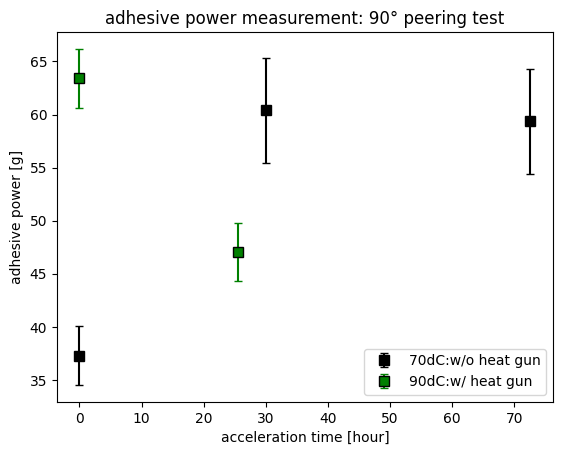